# Cluster Analysis Exercise

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.cluster import KMeans

sns.set()

## Importing Data

In [3]:
data = pd.read_csv("../Datasets/Countries-exercise.csv")

data

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
...,...,...,...
236,Samoa,-172.164851,-13.753243
237,Yemen,47.586762,15.909280
238,South Africa,25.083901,-29.000341
239,Zambia,27.774759,-13.458242


(-180.0, 180.0)

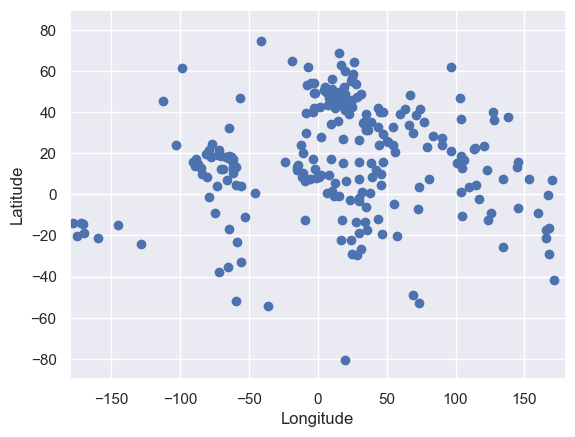

In [4]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.ylim(-90,90)
plt.xlim(-180,180)

In [5]:
x = data.iloc[:, 1:3]
x

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


In [11]:
kmeans = KMeans(4)
kmeans.fit(x)
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 0, 0, 1, 3, 3, 3, 0, 1, 3, 1, 0, 2, 0, 1, 2, 3, 3, 0, 3, 3, 3,
       2, 3, 0, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 2, 2, 0, 0, 3, 1, 2, 3, 0,
       0, 0, 1, 1, 0, 3, 1, 1, 1, 1, 3, 3, 3, 3, 0, 1, 3, 1, 3, 1, 3, 0,
       3, 3, 0, 3, 2, 1, 3, 3, 2, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 1, 3, 1,
       2, 1, 2, 0, 1, 3, 1, 3, 2, 3, 0, 2, 0, 3, 0, 0, 3, 3, 3, 1, 3, 3,
       2, 0, 0, 0, 0, 2, 1, 1, 2, 3, 0, 2, 3, 3, 3, 1, 3, 0, 0, 3, 3, 3,
       2, 1, 3, 3, 3, 0, 0, 1, 2, 3, 3, 3, 2, 3, 2, 2, 0, 3, 1, 0, 0, 2,
       0, 2, 3, 2, 3, 1, 1, 3, 3, 2, 2, 2, 0, 0, 1, 1, 1, 2, 2, 2, 3, 1,
       2, 3, 1, 3, 1, 0, 3, 2, 0, 3, 0, 0, 0, 3, 2, 1, 0, 2, 3, 1, 3, 0,
       0, 1, 3, 0, 1, 3, 3, 3, 0, 1, 0, 3, 1, 3, 3, 2, 0, 0, 2, 1, 1, 3,
       3, 2, 0, 0, 3, 1, 1, 0, 3, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0])

In [12]:
clusters_pd = data.copy()
clusters_pd["Cluster"] = identified_clusters
clusters_pd

,name,Longitude,Latitude,Cluster
0,Aruba,-69.982677,12.520880,1
1,Afghanistan,66.004734,33.835231,0
2,Angola,17.537368,-12.293361,0
3,Anguilla,-63.064989,18.223959,1
4,Albania,20.049834,41.142450,3
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,1
237,Yemen,47.586762,15.909280,0
238,South Africa,25.083901,-29.000341,0
239,Zambia,27.774759,-13.458242,0


(-180.0, 180.0)

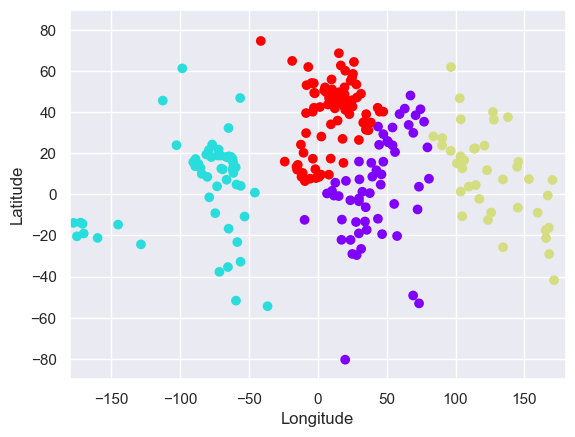

In [13]:
plt.scatter(clusters_pd['Longitude'], clusters_pd['Latitude'], c = clusters_pd['Cluster'], cmap = 'rainbow')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.ylim(-90,90)
plt.xlim(-180,180)

#### WCSS

In [20]:
wcss = []

for i in range(1, len(data['name']) + 1):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

wcss

[1413859.6798344273,
 657012.0797586325,
 325254.48120331316,
 256573.086759343,
 216909.05740754644,
 192442.3963899577,
 127700.73989740422,
 111611.35478510037,
 85732.86460438173,
 76439.49644818816,
 73877.7130347039,
 63730.061516537484,
 65144.67063721131,
 57155.800067177115,
 54479.02974809744,
 52789.10827212856,
 45706.37367180758,
 43384.895342279255,
 42984.23477499272,
 37125.750842889945,
 33580.63141366786,
 35988.666871603345,
 30629.49204872141,
 31883.439845396566,
 30336.010250140345,
 27982.61188453503,
 24806.12003665831,
 25527.15437666906,
 23855.51607089156,
 21960.603103545072,
 19817.626902484037,
 19347.20705789146,
 18397.42099751639,
 17533.613364899953,
 17427.771867838994,
 15815.184730148176,
 16303.37684097993,
 16152.01207076939,
 14748.16425290913,
 15151.905189572137,
 13166.863361469055,
 13083.205574531963,
 12354.906975886062,
 11325.504113177982,
 11795.45978674446,
 10695.944564917178,
 10904.70133913726,
 9804.156822795536,
 10182.228790133326

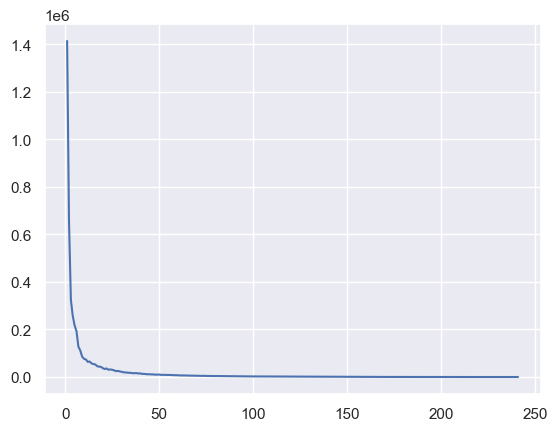

In [22]:
number_of_clusters = range(1, len(wcss) + 1)
plt.plot(number_of_clusters, wcss)